# **Trabajo de aprendizaje supervisado**



### **1. Introducción**  
En el siguiente trabajo vamos a estudiar la posibilidad de predecir la capacidad de supervivencia de pacientes que tuvieron alguna afección cardiaca previa, específicamente vamos a estudiar aquellos pacientes que tuvieron insuficiencias cardiacas (Una insuficiencia cardiaca es la pérdida parcial de la capacidad de bombear la suficiente cantidad de sangre que necesita el cuerpo).  
  
**Pregunta inicial:**  
¿Puede el Machine Learning llegar a predecir la capacidad de supervivencia de un paciente que tuvo una insuficiencia cardiaca?  
  
**Objetivo del trabajo:**  
Para tratar de responder la pregunta inicial, vamos a utilizar un conjunto de datos brindados por el Dr.Chicco y Giuseppe Jurman en 2020, el cual cuenta con la información clínica de pacientes que tuvieron una insuficiencia cardiaca.

### **Índice**
1) Análisis Exploratorio de Datos (_Exploratory Data Analysis_).  
    - Exploración, descripción y procesamiento de los datos.
    - Descripción de la variable target.  
    - Análisis exploratorio. 
2) Modelos.  
    - introducción.  
    - Modelo 0: benchmark.  
    - Modelo 1: Arbol de desición.  
    - Matriz de confusión.  
    - Segundo modelo (Modelo complejo).  
3) Conclusiones. 
4) Futuras mejoras.  

# **Análisis Exploratorio de Datos (_Exploratory Data Analysis_)**

Se comienza haciendo una descripción del dataset donde, utilizando herramientas de _Pandas_ observamos que el dataset cuenta con los registros clínicos de 5000 pacientes, cada uno con 12 diferentes atributos y nuestro target llamado [DEATH_EVENT].

In [1]:
# %% Importacion y apretura del dataset.
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("aadarshvelu/heart-failure-prediction-clinical-records")
df = pd.read_csv(os.path.join(path, 'heart_failure_clinical_records.csv'))
# print(df.shape)
# df.info()

C:\Users\Diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Exploración, descripción y procesamiento de los datos.**

### **Descripcion del dataset:**  
Con la informacion obtenida se observa que:  
    - El dataset cuenta con 13 columnas y 5000 entradas, todas numericas. Hay enteros,decimales y Binarios.  
    - Todas las casillas estan complentas, no hay valores nulos ni faltantes por lo que no sera necesario limpiar, filtrar o llenar valores faltantes.  

|   | **Columna**                  | **Tipo de dato** | **Descripción**                                                                     |
|---|----------------------------- |------------------|-------------------------------------------------------------------------------------|
|0  | `age`                        | Float            | Edad de los pacientes en años.                                                      |
|1  | `anaemia`                    | Binary           | Disminución de los glóbulos rojos o de la hemoglobina (0 = no tiene, 1 = si tiene). |
|2  | `creatinine_phosphokinase`   | Int              | Nivel de la enzima CPK en sangre (mcg/L).                                           |
|3  | `diabetes`                   | Binary           | Si el paciente tiene diabetes (0 = no, 1 = sí).                                     |
|4  | `ejection_fraction`          | Int              | Porcentaje de sangre que sale del corazón en cada contracción (porcentaje).         |
|5  | `high_blood_pressure`        | Binary           | Si el paciente tiene hipertensión.                                                  |
|6  | `platelets`                  | Float            | Plaquetas en la sangre (kiloplaquetas/mL).                                          |
|7  | `serum_creatinine`           | Float            | Nivel de creatinina en sangre (mg/dL).                                              |
|8  | `serum_sodium`               | Int              | Nivel de sodio en suero en la sangre (mEq/L).                                       |
|9  | `sex`                        | Binary           | Hombre o Mujer (0 = Hombre, 1 = Mujer).                                             |
|10 | `smoking`                    | Binary           | Si el paciente fuma o no (0 = no, 1 = sí).                                          |
|11 | `time`                       | Int              | Período de seguimiento (días).                                                      |
|12 | `DEATH_EVENT`                | Binary           | Si el paciente falleció durante el período de seguimiento (0 = no, 1 = sí).         |

### **Preparacion de los datos:**  
- **Convertir las columnas binarias a tipo booleano (`True`/`False`):**  
    Por norma general, los modelos de aprendizaje automatico trabajan mejor los datos binarios si estos estan en booleanos (Estructuracion).  
- **Se elimina la columna `time`:**  
    El objetivo del estudio es predecir a travez de factores clínicos y el tiempo de observación puede tomar ventaja sobre las demás variables o generar confusión.
- **Se agrega la columna `survivor`:**  
    Representa la visión opuesta a `DEATH_EVENT`. Esta transformación se realiza porque muchos modelos de clasificación, por defecto, enfocan sus cálculos en la clase positiva (1).
    En el caso original, la clase 1 en `DEATH_EVENT` indica fallecimiento, pero nos interesa predecir la supervivencia. Por ello, invertimos los valores: en survivor, el valor 1 indica que el paciente sobrevivió, y 0, que falleció. A partir de este punto, los modelos tendrán como objetivo principal identificar correctamente a los pacientes que sobreviven.

|   | Variable                     | ¿Preprocesar?    | ¿Qué hacer?                  | Motivo                                           |
|---|------------------------------| ---------------- | ---------------------------- | ------------------------------------------------ |
|0  | `age`                        | Si               | Convertir a Entero           |Ayudar al modelo a comprender el formato          |
|1  | `anaemia`                    | No               | N/A                          |N/A                                               |
|2  | `creatinine_phosphokinase`   | No               | N/A                          |N/A                                               |
|3  | `diabetes`                   | Si               | Convertir a Boolean          |Ayudar al modelo a comprender el formato          |
|4  | `ejection_fraction`          | No               | N/A                          |N/A                                               |
|5  | `high_blood_pressure`        | Si               | Convertir a Boolean          |Ayudar al modelo a comprender el formato          |
|6  | `platelets`                  | No               | N/A                          |N/A                                               |
|7  | `serum_creatinine`           | No               | N/A                          |N/A                                               |
|8  | `serum_sodium`               | No               | N/A                          |N/A                                               |
|9  | `sex`                        | Si               | Convertir a Boolean          |Ayudar al modelo a comprender el formato          |
|10 | `smoking`                    | Si               | Convertir a Boolean          |Ayudar al modelo a comprender el formato          |
|11 | `time`                       | Si               | Eliminar                     |No es una causa clinica                           |
|12 | `DEATH_EVENT`                | Si               | Convertir a Boolean          |Ayudar al modelo a comprender el formato          |  
|13 | `survivor`                   | No               | Crear                        |Ayudar al modelo a comprender el formato          |  

*Nota: tambien se podria hacer la estandarizacion de las variables que puedan afectar el rendimiento de algunos modelos. Como los modelos utilizados en este análisis (árboles de decisión y Random Forest) no se ven afectados significativamente por las escalas de las variables, no es necesario realizar una estandarización. De hecho, hacerlo podría incluso perjudicar la interpretabilidad del modelo.*

### **Procesamiento de los datos**

In [2]:
# %% Procesamiento

# drop de la columna time.
df = df.drop('time',axis=1)

# crear la columna survivor.
df['survivor'] = 1 - df['DEATH_EVENT']

# Lista de columnas binarias
cols_binarias = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT','survivor']

# Conversión a booleano
df[cols_binarias] = df[cols_binarias].astype(bool)

# Conversión de la columna 'age' a tipo entero
df['age'] = df['age'].astype(int)

### **Descripción de la variable target**
Finalizada la limpieza y transformación de los datos, nos disponemos a estudiar la variable target  `survivor` que nos dice si el paciente sobrevivió o no durante el periodo de seguimiento.

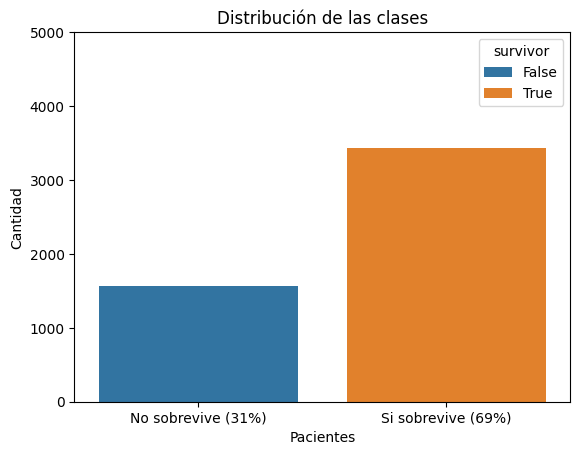

In [3]:
# %% Grafico de la distribucion del targuet.

import matplotlib.pyplot as plt
import seaborn as sns

plt.ylim(0, 5000)
sns.countplot(data=df, x='survivor', hue='survivor')
plt.title('Distribución de las clases')
plt.xticks(ticks=[0, 1], labels=['No sobrevive (31%)', 'Si sobrevive (69%)'])
plt.ylabel('Cantidad')
plt.xlabel('Pacientes')
plt.show()

**Conclusiones**  
Sabemos que target es de tipo binario y observando el gráfico vemos que tiene una distribución asimétrica entre las clases, se observa que de los 5000 registros, 69% son pacientes que sobrevivieron y 31% son pacientes que no lograron sobrevivir. Si bien no es una diferencia tan significativa como lo sería un 80/20 o 90/10, igualmente lo tendremos en cuenta a la hora de prerpara los datos para los modelos.

### **Análisis exploratorio**  
Como paso siguiente, queremos saber la correlación de los atributos con la variable target para lo que armamos el siguiente gráfico:

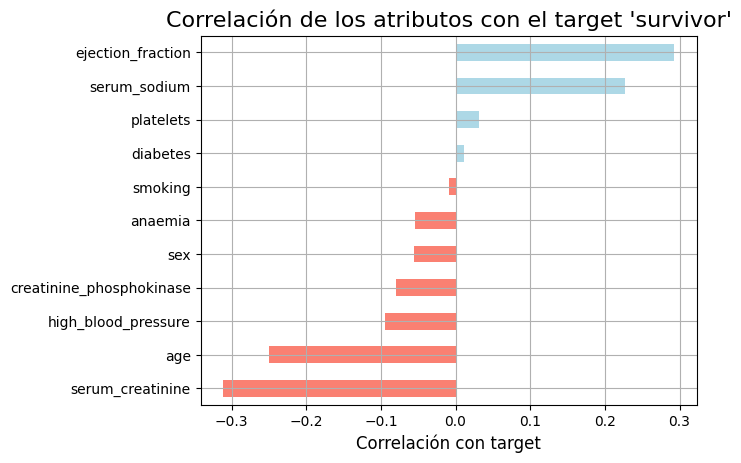

In [4]:
# %% Gráfico de correlaciones con colores condicionales
cor_matrix = df.corr(numeric_only=True)
cor_target = cor_matrix['survivor'].drop(['survivor', 'DEATH_EVENT'])

# Colores condicionales: verde si es positivo, rojo si es negativo
colors = ['lightblue' if val >= 0 else 'salmon' for val in cor_target.sort_values()]

# Gráfico
cor_target.sort_values().plot(
    kind='barh',
    color=colors
)
plt.xlabel("Correlación con target", fontsize=12)
plt.title("Correlación de los atributos con el target 'survivor'", fontsize=16)
plt.grid(True)
plt.show()


**Descripción del gráfico:**  
El grafico represena la correlacion entre los atributos del dataset con el targuet `survivor`.  
- `ejection_fraction` y `serum_sodium` presentan una fuerte correlación positiva con `survivor`. Esto sugiere que valores más altos de estos indicadores están relacionados con una mayor probabilidad de supervivencia.  
- `serum_creatinine` y `age` presentan una fuerte correlación negativa con `survivor`, lo que implica que valores altos de creatinina en sangre o mayor edad se asocian con una menor probabilidad de supervivencia.

*nota: La mayoría de las variables categóricas (smoking, diabetes, anaemia, etc.) presentan correlaciones débiles, lo cual es esperable ya que la correlación de Pearson captura relaciones lineales y puede subestimar asociaciones no lineales.*

# **Modelos**

### **introducción:**  
De acá en adelante vamos a  comenzar a desarrollar los modelos que fuimos utilizando para responder a la pregunta inicial. Abordaremos desde modelos simples y graficables hasta modelos más complejos de los cuales determinaremos su eficiencia con métodos de evaluación no tan visuales como un gráfico. 
En este punto, tenemos que aclarar que en función de lo analizado antes estamos delante de un problema de clasificación y nuestro objetivo será entrenar modelos para que puedan predecir correctamente la clase en función de los atributos.
Para todos los modelos vamos a dividir el conjunto de datos en 2 partes, 80% de los datos van a ser para entrenamiento y 20% para testeo. Se utilizó el parámetro stratify=y para garantizar que la distribución de clases de la variable target se conserve tanto en el conjunto de entrenamiento como en el de prueba.


In [5]:
# %% Train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['DEATH_EVENT','survivor'], axis=1)
y = df['survivor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Modelo 0: Benchmark**

El modelo Benchmark es un modelo sencillo, no aprende patrones pero si nos marca un piso base desde donde comparar los modelos siguientes y que tanto mejoran.  
Como estamos delante de un problema de clasificación, vamos a usar un Dummy Classifier con la estrategia de `most_frequent` que sin mirar los atributos, va a predecir el target asumiendo que el 100% de los casos es el más frecuente (en nuestro caso "sobrevive" es el más frecuente por que que siempre va a predecir que sobrevive). Luego en Testeo, como el conjunto de testeo tiene una distribución aproximadamente igual a la de entrenamiento, el modelo debería predecir aproximadamente con un 69% de exactitud.  

In [6]:
# %% Dummy Classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo dummy
bmark = DummyClassifier(strategy='most_frequent')
bmark.fit(X_train, y_train)

# predecir con el modelo entrenado
y_pred_dummy = bmark.predict(X_test)

# Metricas
print(f"Dummy Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dummy))

Dummy Classifier Metrics:
Accuracy: 0.686


Las métricas nos muestran que el modelo predice aproximadamente el 69% de los datos, lo cual corresponde con la estrategia utilizada.

### **Modelo 1: Arbol de deciciones con 2 variables**

El primer modelo que vamos a desarrollar es un DecisionTreeClassifier de 2 atributos. Los atributos que vamos a usar son los que vemos más relevantes en la gráfica de correlaciones que son `serum_creatinine` y `ejecton_fraction`.

#### **Arbol de desiciones con los atributos `serum_creatinine` y `ejection_fraction`:**  
En este punto se evaluarán modelos de árbol de decisión utilizando solo dos atributos, explorando diferentes niveles de profundidad desde 1 hasta 5. Se graficarán específicamente los árboles con profundidades 2, 3 y 4 para visualizar el comportamiento del modelo y detectar posibles señales de overfitting o subajuste.

Además, se incluirá una gráfica que muestra la evolución de distintas métricas de evaluación (como precisión, recall y F1-score) en función de la profundidad del árbol.

Para seleccionar la mejor profundidad, consideraremos el contexto clínico del problema: un falso positivo en este caso es una persona que se predice como sobreviviente pero que en realidad no lo hace. Este tipo de error puede generar una falsa sensación de seguridad, por lo tanto, nuestra métrica principal será la precisión (precision), que indica qué proporción de las personas que el modelo predice como sobrevivientes efectivamente lo son.

En otras palabras, seleccionaremos el modelo que logre una buena capacidad predictiva, pero dando especial importancia a reducir los falsos positivos, lo cual se refleja directamente en un mayor valor de la métrica de precisión.

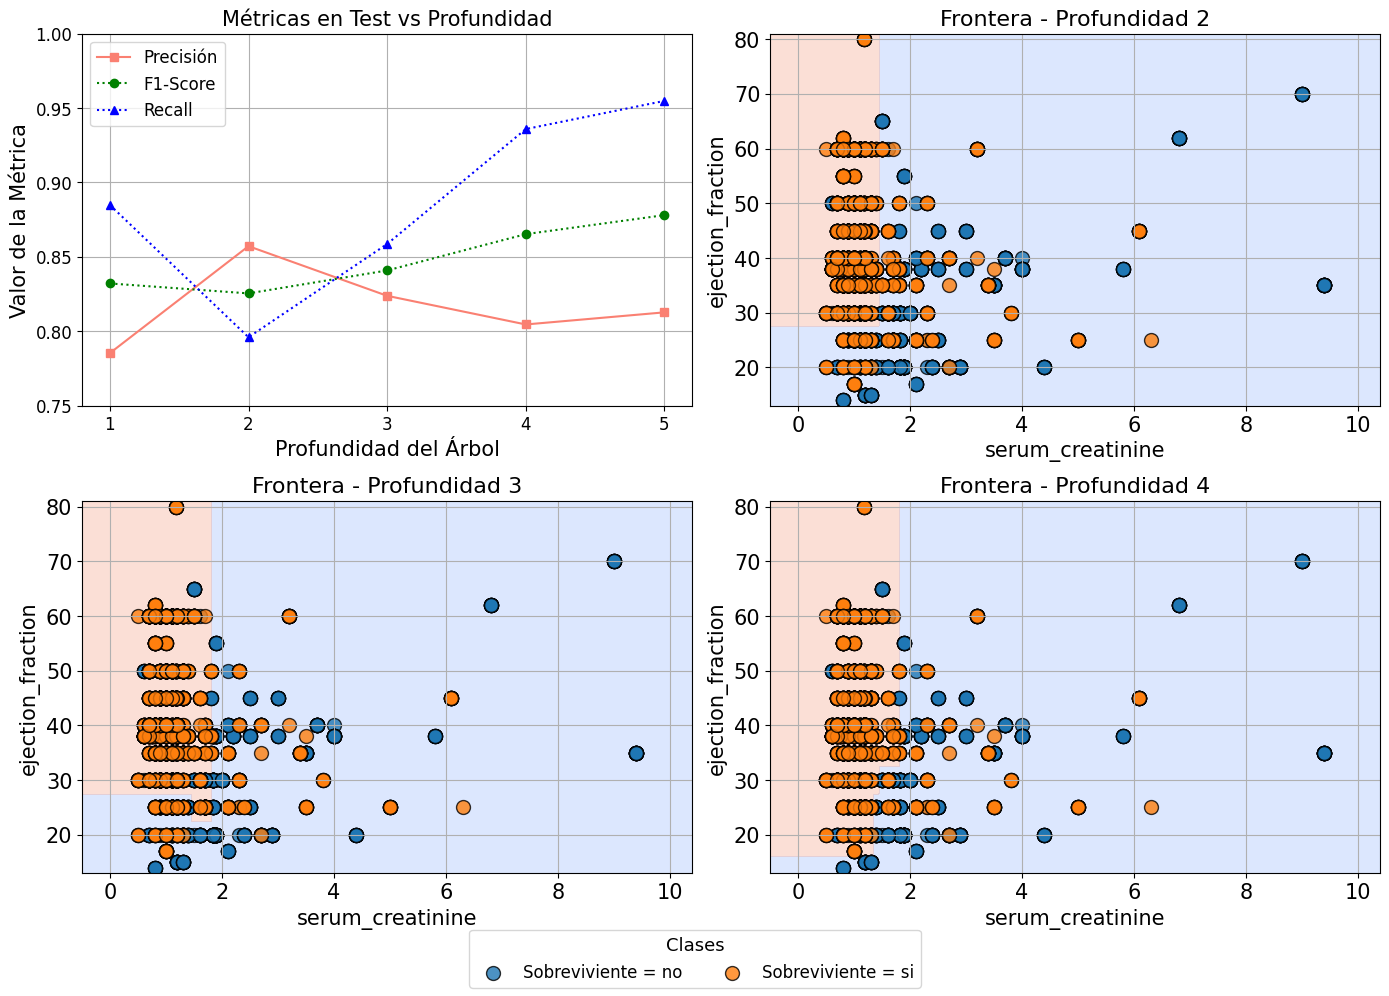

In [7]:
# %%Creacion, entrenamiento y grafico del Arbol de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# --- Elegir variables aquí ---
variables = ['serum_creatinine', 'ejection_fraction']

# Datos para entrenamiento y test
X_train_sub = X_train[variables]
X_test_sub = X_test[variables]

# Métricas en test
precision_test = []
f1_test = []
recall_test = []

depths = [i for i in range(1, 6)]  # Profundidades del árbol de decisión

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_sub, y_train)
    y_pred_test = model.predict(X_test_sub)

    precision_test.append(precision_score(y_test, y_pred_test))
    f1_test.append(f1_score(y_test, y_pred_test))
    recall_test.append(recall_score(y_test, y_pred_test))

# Grilla 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# --- Gráfico 1: métricas ---
ax = axs[0, 0]
ax.set_ylim(0.75,1)
ax.plot(depths, precision_test, marker='s', label='Precisión', color='salmon')
ax.plot(depths, f1_test, marker='o', label='F1-Score', color='green', linestyle=':')
ax.plot(depths, recall_test, marker='^', label='Recall', color='blue', linestyle=':')

ax.set_title("Métricas en Test vs Profundidad", fontsize=15)
ax.set_xlabel("Profundidad del Árbol", fontsize=15)
ax.set_ylabel("Valor de la Métrica", fontsize=15)
ax.set_xticks(depths)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)
ax.grid(True)

# --- Fronteras de decisión ---

# Ubicacion del grafico en la grilla
for i, depth in enumerate([2, 3, 4]):
    row = (i + 1) // 2
    col = (i + 1) % 2
    ax = axs[row, col]

    # Creacion y entrenamiento del modelo:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_sub, y_train)

    # Extraccion de los maximos y minos
    x_min, x_max = X_train_sub.iloc[:, 0].min() - 1, X_train_sub.iloc[:, 0].max() + 1
    y_min, y_max = X_train_sub.iloc[:, 1].min() - 1, X_train_sub.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    X_grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=variables)
    Z = model.predict(X_grid).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    for clase in [0, 1]:
        subset = X_train_sub[y_train == clase]
        if clase == 0:
            clase = 'no' 
        else:
            clase = 'si'
        ax.scatter(
            subset.iloc[:, 0],
            subset.iloc[:, 1],
            label=f'Sobreviviente = {clase}',
            edgecolor='black',
            alpha=0.8,
            s=100
        )
    # Configuración del gráfico
    ax.set_title(f"Frontera - Profundidad {depth}", fontsize=16)
    ax.set_label
    ax.set_xlabel(variables[0], fontsize=15)
    ax.set_ylabel(variables[1], fontsize=15)
    ax.tick_params(axis='both', labelsize=15)
    ax.grid(True)

# Leyenda global
handles, labels = axs[1, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Clases", loc='lower center', ncol=3, fontsize=12, title_fontsize=13)

# Ajustar el layout
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


Conclusión: En el gráfico de métricas se observa que la profundidad 2 es la que optimiza mejor la métrica de recall, lo cual es coherente con nuestro objetivo de maximizar la detección de verdaderos positivos (personas que efectivamente sobreviven). 

Si bien los gráficos de profundidad 3 y 4 no presentan signos evidentes de overfitting, al buscar mejorar métricas como el recall —_y, en consecuencia, el F1-score_—, el árbol tiende a perder precisión, ya que incrementa la cantidad de falsos positivos.

### **Matriz de confusión:**  
Para reforzar las conclusiones anteriores, se presentará un gráfico con las matrices de confusión correspondientes a las profundidades 2, 3 y 4, junto con el gráfico de métricas. Esto permitirá observar cómo evolucionan las métricas de evaluación y confirmar que el modelo con profundidad 2 resulta el más adecuado en función del equilibrio entre recall, precisión y F1-score.

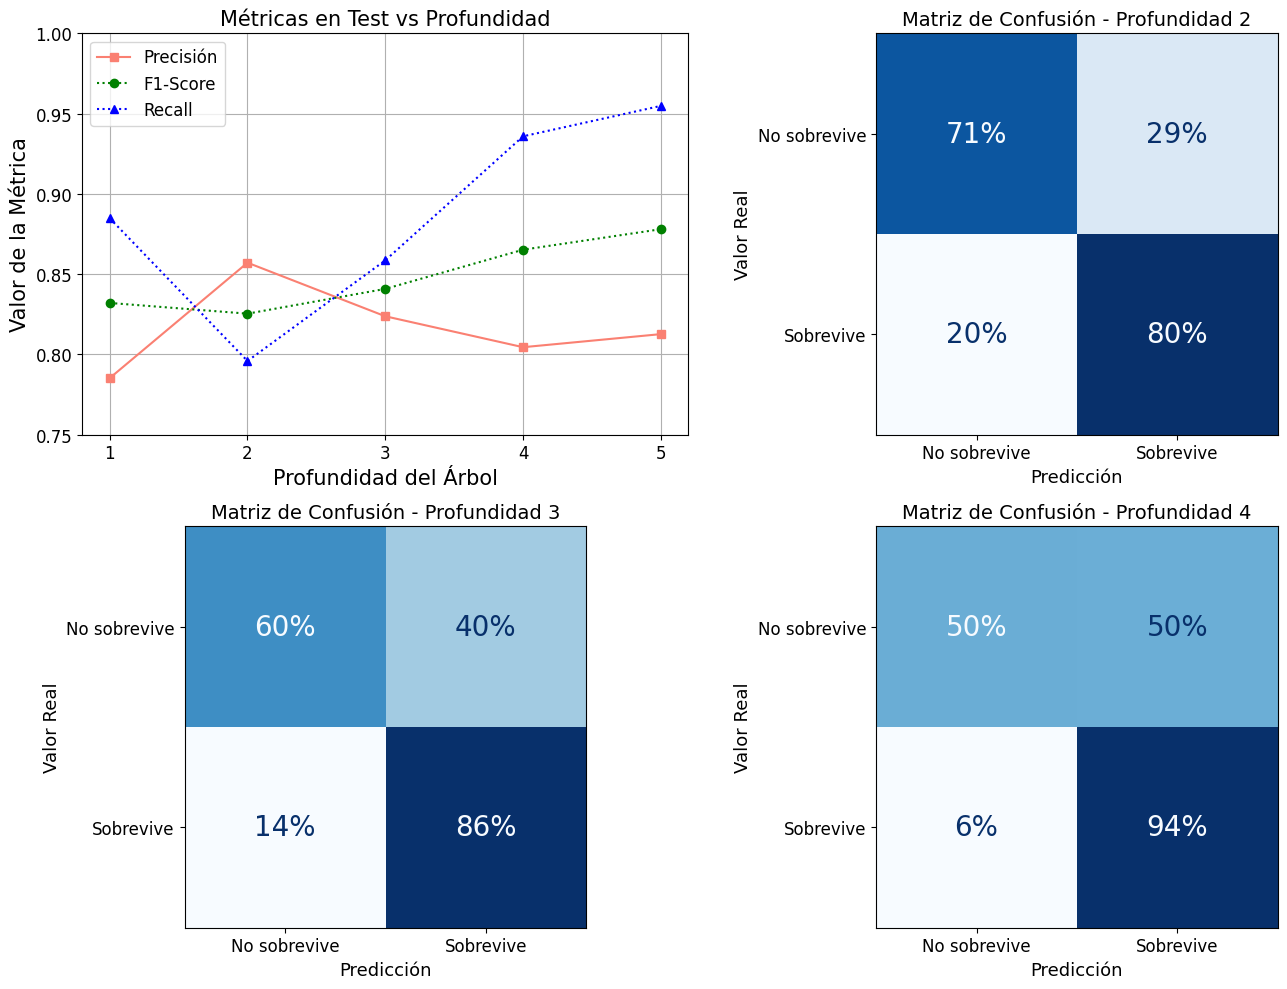

In [8]:
# %% Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Elegir variables aquí ---
variables = ['serum_creatinine', 'ejection_fraction']

# Datos para entrenamiento y test
X_train_sub = X_train[variables]
X_test_sub = X_test[variables]

# Métricas en test
precision_test = []
f1_test = []
recall_test = []

depths = [i for i in range(1, 6)]  # Profundidades del árbol de decisión

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_sub, y_train)
    y_pred_test = model.predict(X_test_sub)

    precision_test.append(precision_score(y_test, y_pred_test))
    f1_test.append(f1_score(y_test, y_pred_test))
    recall_test.append(recall_score(y_test, y_pred_test))

# Grilla 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# --- Gráfico 1: métricas ---
ax = axs[0, 0]
ax.set_ylim(0.75, 1)
ax.plot(depths, precision_test, marker='s', label='Precisión', color='salmon')
ax.plot(depths, f1_test, marker='o', label='F1-Score', color='green', linestyle=':')
ax.plot(depths, recall_test, marker='^', label='Recall', color='blue', linestyle=':')

ax.set_title("Métricas en Test vs Profundidad", fontsize=15)
ax.set_xlabel("Profundidad del Árbol", fontsize=15)
ax.set_ylabel("Valor de la Métrica", fontsize=15)
ax.set_xticks(depths)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)
ax.grid(True)

# --- Matrices de confusión para profundidad 2, 3 y 4 ---
for i, depth in enumerate([2, 3, 4]):
    row = (i + 1) // 2
    col = (i + 1) % 2
    ax = axs[row, col]

    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_sub, y_train)
    y_pred_test = model.predict(X_test_sub)

    cm_disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_test,
        ax=ax,
        cmap='Blues',
        colorbar=False,
        display_labels=["No sobrevive", "Sobrevive"],
        normalize='true', 
        values_format=".0%"
    )
    ax.set_title(f"Matriz de Confusión - Profundidad {depth}", fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    
    
    # Ejes
    ax.set_xlabel("Predicción", fontsize=13)
    ax.set_ylabel("Valor Real", fontsize=13)

    # Agrandar los valores dentro de las celdas
    for text in ax.texts:
        text.set_fontsize(20)

# Ajustar el layout
plt.tight_layout()
plt.show()

Tabla de valores:

| Profundidad | Precisión | Recall | F1-score | Accuracy |
| ----------- | --------- | ------ | -------- | -------- |
| 2           | 85.7%     | 79.6%  | 82.5%    | 76.9%    |
| 3           | 82.4%     | 85.9%  | 84.1%    | 77.7%    |
| 4           | 80.4%     | 93.6%  | 86.5%    | 80.0%    |

Conclusiones:

Observamos que al aumentar la profundidad del modelo y mejorar la accuracy, el recall mejora notablemente, lo que a su vez incrementa el f1. Sin embargo, la precisión disminuye en 5 puntos al pasar de la profundidad 2 a la 4. Como el modelo se enfoca en aumentar los verdaderos positivos, para que la precisión disminuya es porque han aumentado los falsos positivos, lo cual no es deseable. Por lo tanto, la profundidad 2 resulta ser la más óptima.

### **Segundo modelo (Modelo complejo)**  
Para este segundo modelo, vamos a buscar maximizar el desempeño de un árbol de decisión utilizando todos los atributos disponibles.

A diferencia de los modelos anteriores, en este caso no podremos graficar las fronteras de decisión, por lo que evaluaremos el modelo mediante gráficos del desempeño en train y test para las métricas de precisión, recall, F1-score y acuraccy. El objetivo es analizar el compromiso entre sesgo y varianza para seleccionar el hiperparámetro de profundidad óptimo.

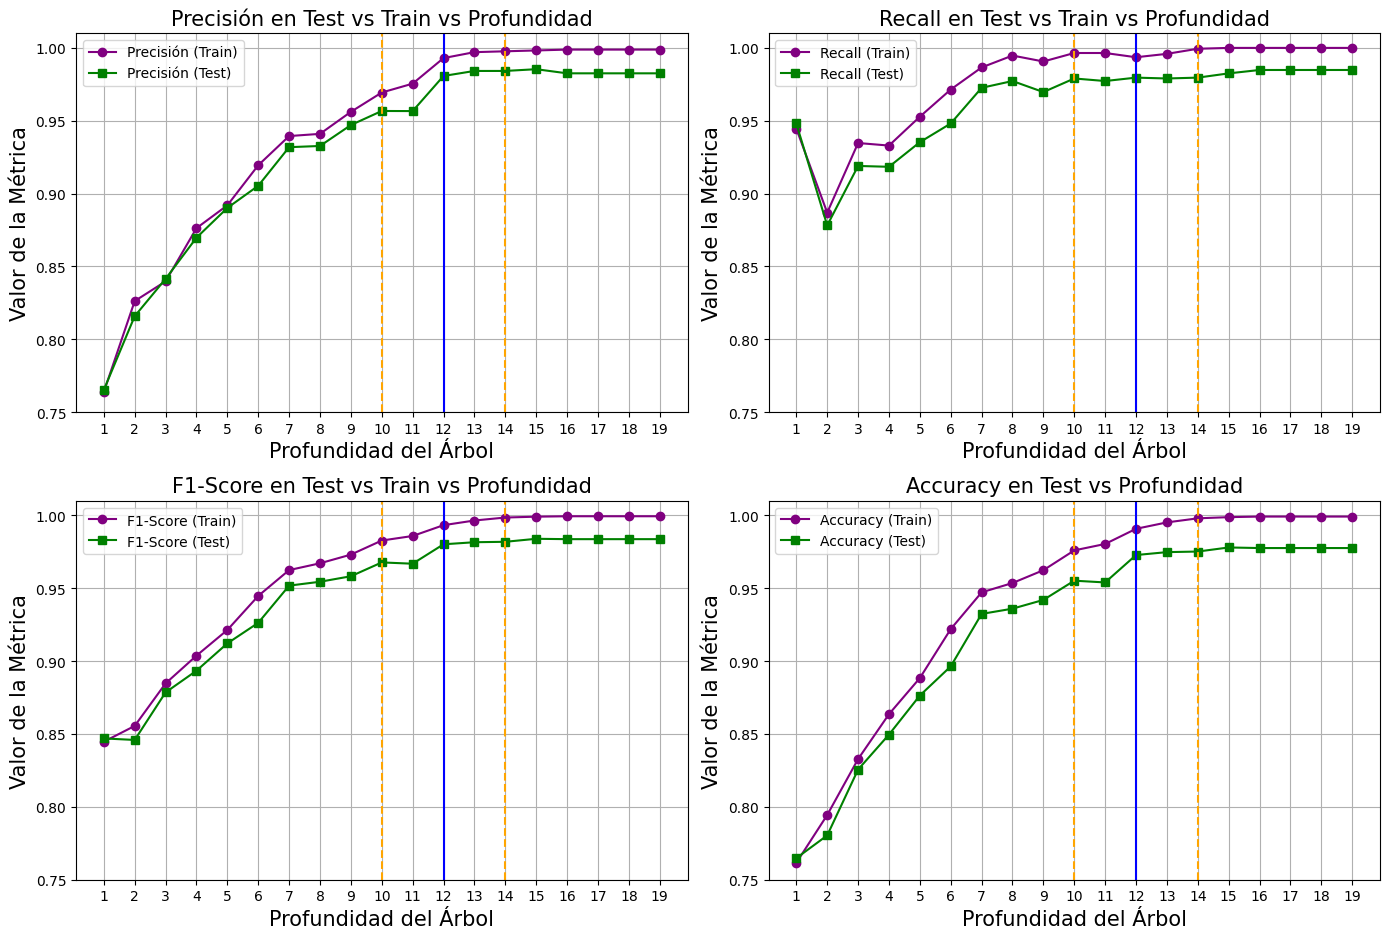

In [12]:
# %% Segundo modelo (Modelo complejo)

from sklearn.metrics import accuracy_score

# Métricas en test

accuracy_test = []
accuracy_train = []
precision_test = []
precision_train = []
f1_test = []
f1_train = []
recall_test = []
recall_train = []

depths = [i for i in range(1, 20)]

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    accuracy_train.append(accuracy_score(y_train, y_pred_train))  
    accuracy_test.append(accuracy_score(y_test, y_pred_test))     
    precision_test.append(precision_score(y_test, y_pred_test))
    precision_train.append(precision_score(y_train, y_pred_train))
    f1_test.append(f1_score(y_test, y_pred_test))
    f1_train.append(f1_score(y_train, y_pred_train))
    recall_test.append(recall_score(y_test, y_pred_test))
    recall_train.append(recall_score(y_train, y_pred_train))
    

# Grilla 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# === PRECISIÓN ===
ax = axs[0, 0]
ax.set_ylim(0.75, 1.01)
ax.plot(depths, precision_train, marker='o', label='Precisión (Train)', color='purple')
ax.plot(depths, precision_test, marker='s', label='Precisión (Test)', color='green')
ax.set_title("Precisión en Test vs Train vs Profundidad", fontsize=15)
ax.set_xlabel("Profundidad del Árbol", fontsize=15)
ax.set_ylabel("Valor de la Métrica", fontsize=15)
ax.set_xticks(depths)
ax.legend()
ax.grid(True)
ax.axvline(x=14, color='orange', linestyle='--')
ax.axvline(x=10, color='orange', linestyle='--')
ax.axvline(x=12, color='blue')

# === RECALL ===
ax1 = axs[0, 1]
ax1.set_ylim(0.75, 1.01)
ax1.plot(depths, recall_train, marker='o', label='Recall (Train)', color='purple')
ax1.plot(depths, recall_test, marker='s', label='Recall (Test)', color='green')
ax1.set_title("Recall en Test vs Train vs Profundidad", fontsize=15)
ax1.set_xlabel("Profundidad del Árbol", fontsize=15)
ax1.set_ylabel("Valor de la Métrica", fontsize=15)
ax1.set_xticks(depths)
ax1.legend()
ax1.grid(True)
ax1.axvline(x=14, color='orange', linestyle='--')
ax1.axvline(x=10, color='orange', linestyle='--')
ax1.axvline(x=12, color='blue')

# === F1-SCORE ===
ax2 = axs[1, 0]
ax2.set_ylim(0.75, 1.01)
ax2.plot(depths, f1_train, marker='o', label='F1-Score (Train)', color='purple')
ax2.plot(depths, f1_test, marker='s', label='F1-Score (Test)', color='green')
ax2.set_title("F1-Score en Test vs Train vs Profundidad", fontsize=15)
ax2.set_xlabel("Profundidad del Árbol", fontsize=15)
ax2.set_ylabel("Valor de la Métrica", fontsize=15)
ax2.set_xticks(depths)
ax2.legend()
ax2.grid(True)
ax2.axvline(x=14, color='orange', linestyle='--')
ax2.axvline(x=10, color='orange', linestyle='--')
ax2.axvline(x=12, color='blue')

# === ACCURACY ===
ax3 = axs[1, 1]
ax3.set_ylim(0.75, 1.01)
ax3.plot(depths, accuracy_train, marker='o', label='Accuracy (Train)', color='purple')
ax3.plot(depths, accuracy_test, marker='s', label='Accuracy (Test)', color='green')
ax3.set_title("Accuracy en Test vs Profundidad", fontsize=15)
ax3.set_xlabel("Profundidad del Árbol", fontsize=15)
ax3.set_ylabel("Valor de la Métrica", fontsize=15)
ax3.set_xticks(depths)
ax3.legend()
ax3.grid(True)
ax3.axvline(x=14, color='orange', linestyle='--')
ax3.axvline(x=10, color='orange', linestyle='--')
ax3.axvline(x=12, color='blue')

# Ajustar para que no se solape nada
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


Conclusiones:

- **Comportamiento general de las métricas:**  
    Las cuatro métricas evaluadas (Precisión, Recall, F1-Score y Accuracy) muestran un crecimiento sostenido a medida que aumenta la profundidad del árbol, hasta alcanzar una meseta entre las profundidades 10 y 14. Este comportamiento indica que el modelo gana capacidad predictiva hasta ese punto, pero deja de mejorar significativamente más allá.

- **Elección de la profundidad óptima:**  
    Se considera la profundidad 12 como la óptima, ya que en este punto se observa una mejora clara en las métricas (especialmente en Precisión y Accuracy) y a partir de allí los valores se estabilizan sin aportar mejoras adicionales. Elegir una profundidad mayor podría aumentar el riesgo de sobreajuste (overfitting), sin beneficios reales en desempeño.

- **Relación entre Train y Test:**  
    Las curvas de desempeño en los conjuntos de entrenamiento y prueba son muy similares, lo que sugiere que el modelo generaliza bien y no hay evidencia fuerte de sobreajuste en las profundidades analizadas. Idealmente, se esperaría que el rendimiento en test alcance un máximo y luego disminuya levemente por sobreajuste, pero en este caso las métricas se mantienen estables incluso con profundidades mayores.

# **Conclusiones**

A lo largo de este trabajo estudiamos cómo el machine learning puede ayudarnos a determinar si un paciente con antecedentes de afecciones cardíacas tiene probabilidades de sobrevivir. Para ello, utilizamos árboles de decisión con el objetivo de segmentar a los pacientes e identificar con la mayor precisión posible a aquellos con mayor probabilidad de supervivencia.

En primer lugar, construimos un modelo simple utilizando solo dos atributos. Este modelo logró desagregar rápidamente el conjunto de entrenamiento, alcanzando una precisión aproximada del 86% (es decir, de los pacientes que el modelo predice que sobrevivirán, el 86% efectivamente lo hacen).

Posteriormente, desarrollamos un modelo más complejo que incluye todos los atributos disponibles y sin restricciones de profundidad. En este caso, observamos que los atributos permiten una segmentación muy precisa del conjunto de entrenamiento. Los gráficos de métricas muestran que, incluso al aumentar la profundidad del árbol, no se evidencian signos de overfitting, lo cual sugiere que los atributos están altamente correlacionados con la variable objetivo (target).

Como conclusión, consideramos que no es necesario desarrollar modelos más complejos, ya que hemos alcanzado métricas representativas (precisión, recall, F1-score, accuracy) superiores al 95%, lo que indica una excelente capacidad de segmentación del conjunto de datos.

# **Futuras mejoras:**

Como posibles mejoras al presente notebook, se pueden considerar las siguientes secciones:

- **Validación cruzada:** Incorporar técnicas de validación cruzada _(por ejemplo, k-fold cross-validation)_ permitiría obtener una estimación más robusta y generalizable del rendimiento del modelo, reduciendo la dependencia de una única partición del conjunto de datos.

- **Análisis con curvas AUC-ROC:** Agregar gráficos de curvas AUC-ROC brindaría una perspectiva adicional sobre el desempeño del modelo, especialmente útil en contextos de desbalance de clases. Esta métrica ayuda a visualizar la relación entre la tasa de verdaderos positivos y la de falsos positivos a diferentes umbrales de decisión.

- **Modelos de ensamble:** Implementar modelos de ensamble como Random Forest o Gradient Boosting permitiría contrastar el rendimiento del árbol de decisión simple con alternativas más robustas y precisas. Estas técnicas suelen mejorar el desempeño general al reducir la varianza y evitar el sobreajuste, gracias a la combinación de múltiples árboles.